In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/2022/Divvy_Trips_2022_full.csv.gz', compression='gzip')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


# Построение графов по связям станций
Гипотеза: станции с похожим паттерном ID будут образовывать связи между собой, а станции с зарядкой - становится центром связей

## Построим граф по всем станциям

In [4]:
df = df.dropna(subset=['start_station_id'])

In [5]:
df = df[(df['start_station_id'] != df['end_station_id'])]

In [6]:
trips = pd.DataFrame(df[['start_station_name', 'end_station_name'
                         ]].value_counts()).reset_index().head(150)

In [7]:
import networkx as nx

G = nx.from_pandas_edgelist(trips,
                            'start_station_name',
                            'end_station_name',
                            edge_attr='count')

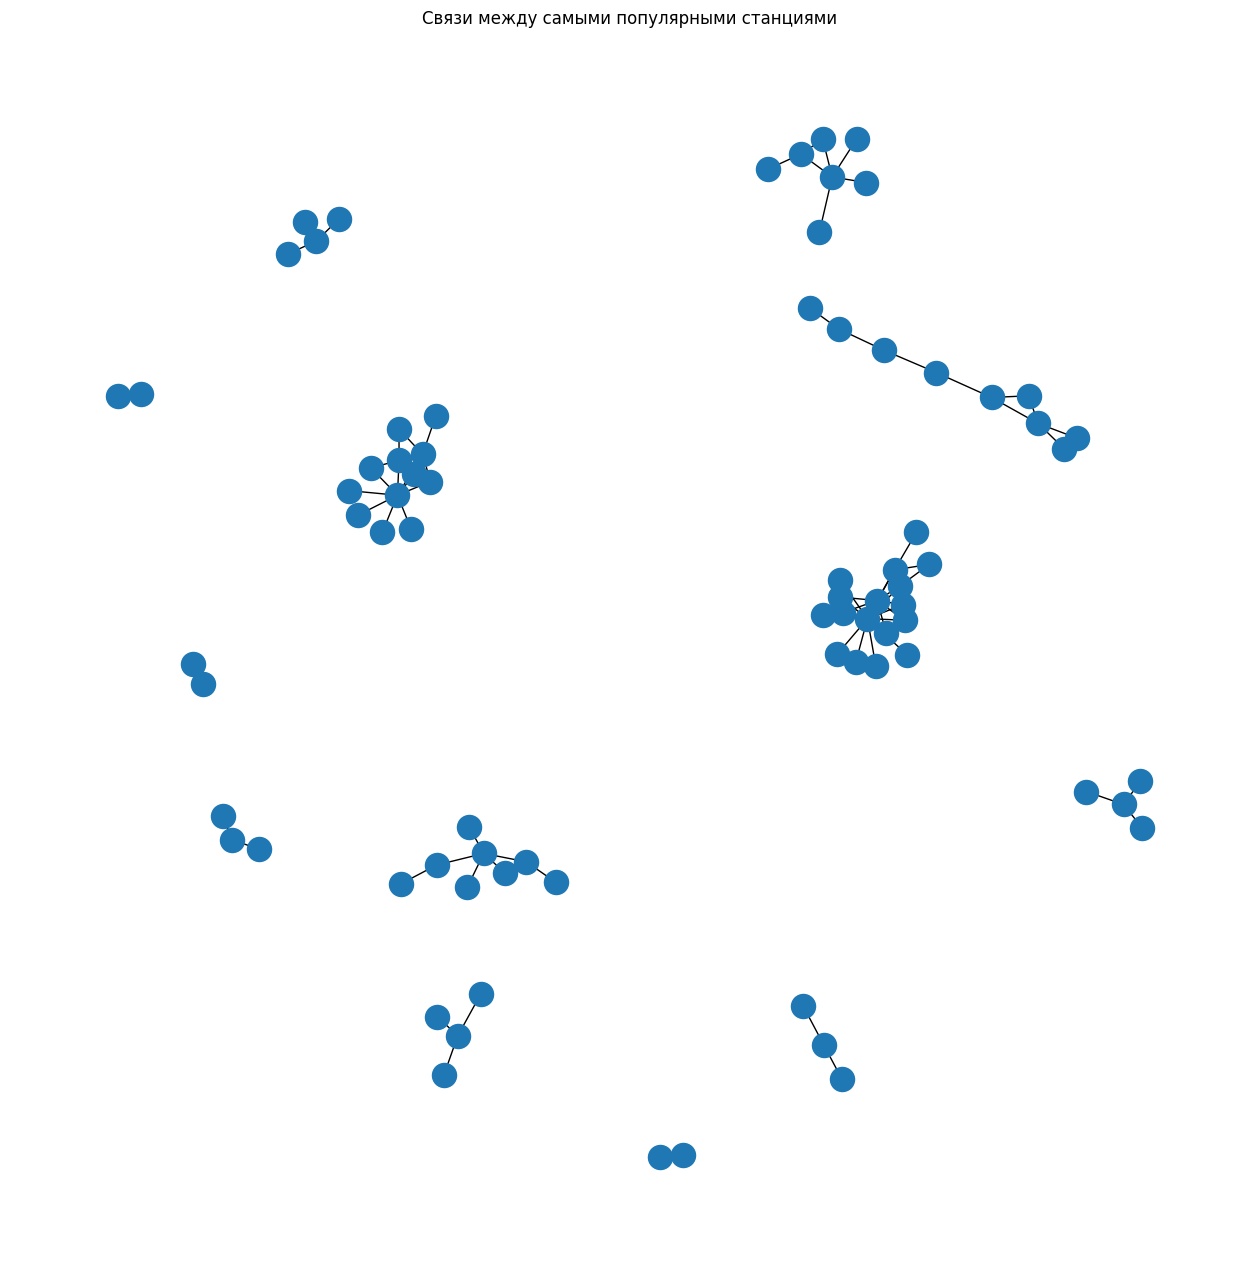

In [13]:
plt.figure(figsize=(16, 16))
plt.title("Связи между самыми популярными станциями")
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos)

## Построим граф по станциям с ID начинающимся на KA

In [19]:
ka_df = df[(df['start_station_id'].str.startswith('KA'))
           & (df['end_station_id'].str.startswith('KA')) &
           (df['start_station_id'] != df['end_station_id'])]
ka_trips = pd.DataFrame(ka_df[['start_station_name', 'end_station_name'
                               ]].value_counts()).reset_index().head(150)
G = nx.from_pandas_edgelist(ka_trips,
                            'start_station_name',
                            'end_station_name',
                            edge_attr='count')

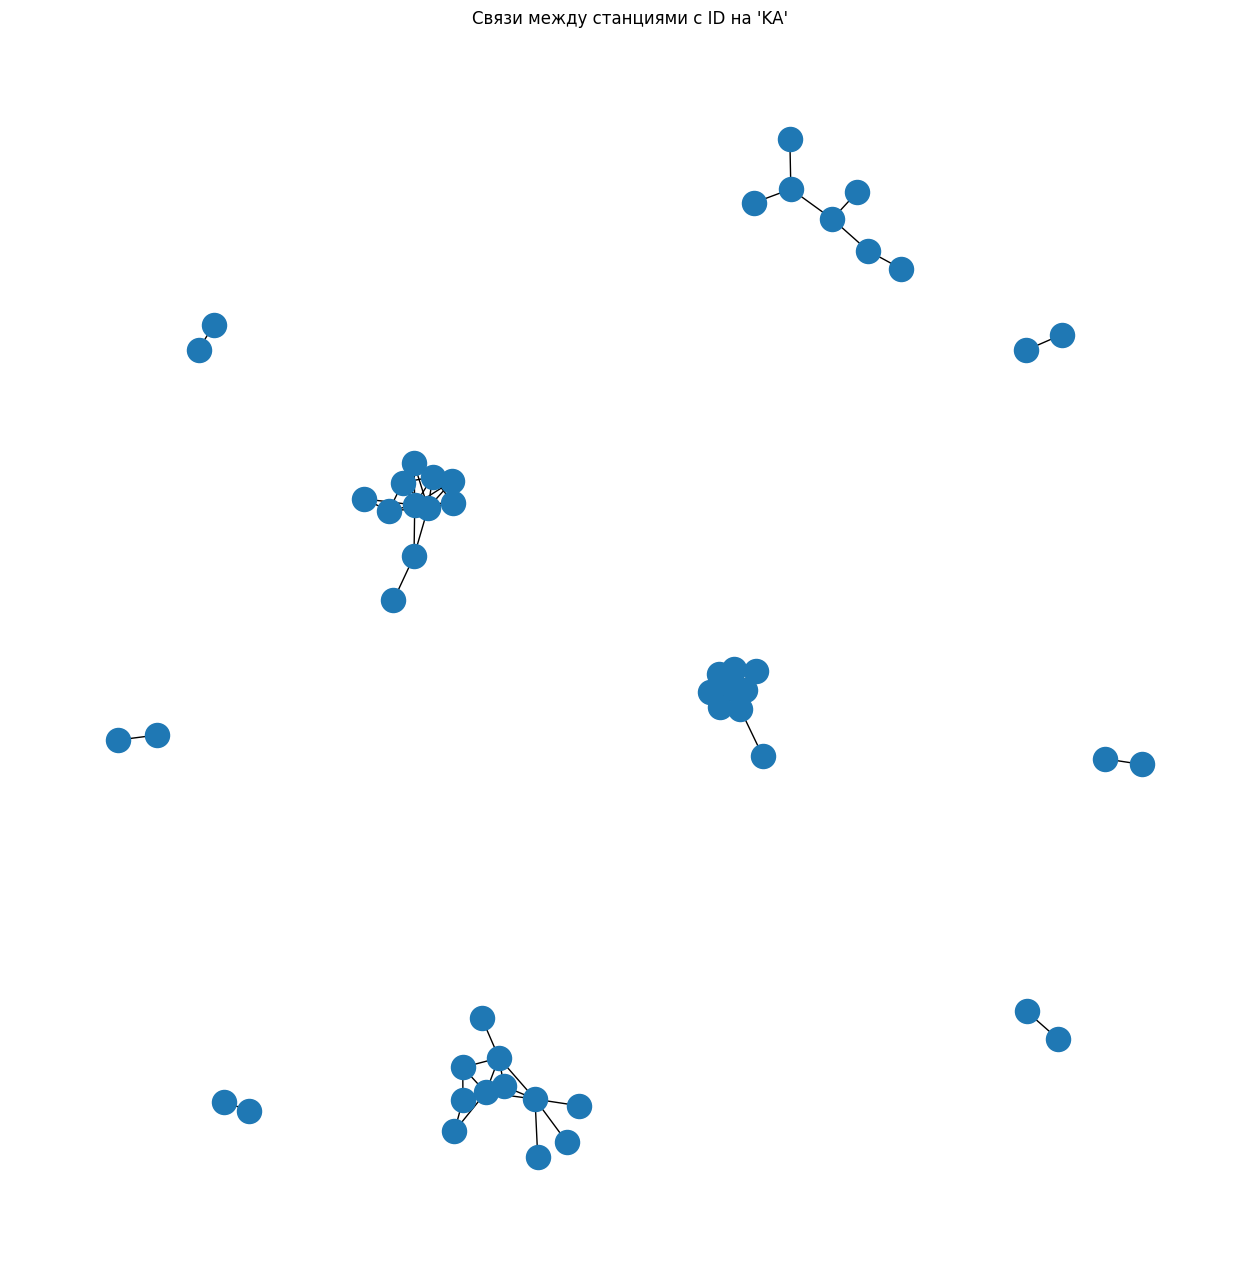

In [20]:
plt.figure(figsize=(16, 16))
plt.title("Связи между станциями с ID на 'KA'")
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos)

## Построим граф по станциям с ID начинающимся на TA

In [21]:
ta_df = df[(df['start_station_id'].str.startswith('TA'))
           & (df['end_station_id'].str.startswith('TA')
              & (df['start_station_id'] != df['end_station_id']))]
ta_trips = pd.DataFrame(ta_df[['start_station_name', 'end_station_name'
                               ]].value_counts()).reset_index().head(150)
G = nx.from_pandas_edgelist(ta_trips,
                            'start_station_name',
                            'end_station_name',
                            edge_attr='count')

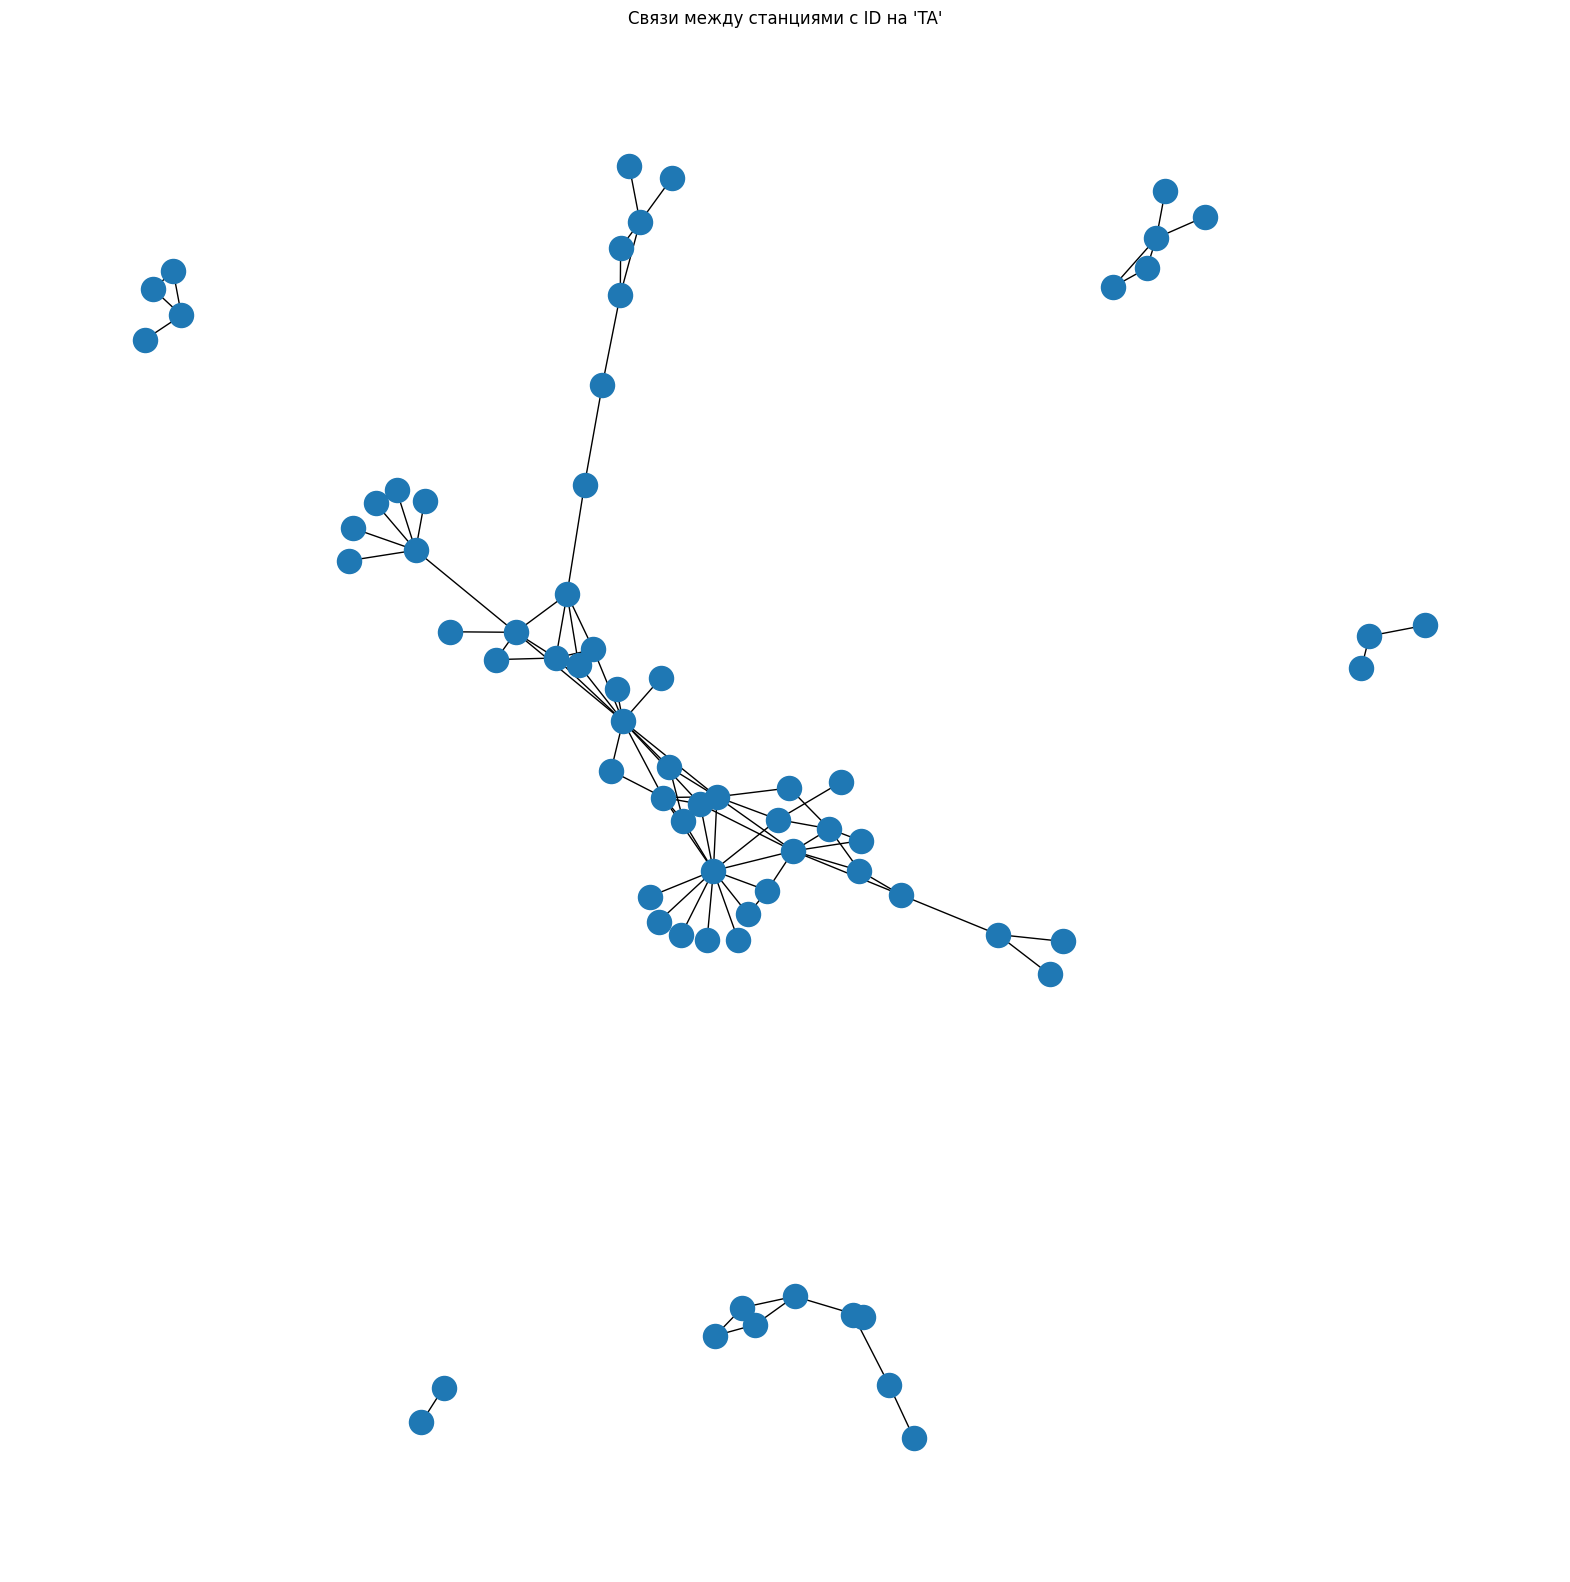

In [22]:
plt.figure(figsize=(20, 20))
plt.title("Связи между станциями с ID на 'TA'")
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos)

## Построим граф по станциям с ID состоящим из трех цифр

In [23]:
three_digits_df = df[(df['start_station_id'].str.contains('^\d{3}$'))
                     & (df['end_station_id'].str.contains('^\d{3}$')
                        & (df['start_station_id'] != df['end_station_id']))]
three_digits_trips = pd.DataFrame(three_digits_df[[
    'start_station_name', 'end_station_name'
]].value_counts()).reset_index().head(150)
G = nx.from_pandas_edgelist(three_digits_trips,
                            'start_station_name',
                            'end_station_name',
                            edge_attr='count')

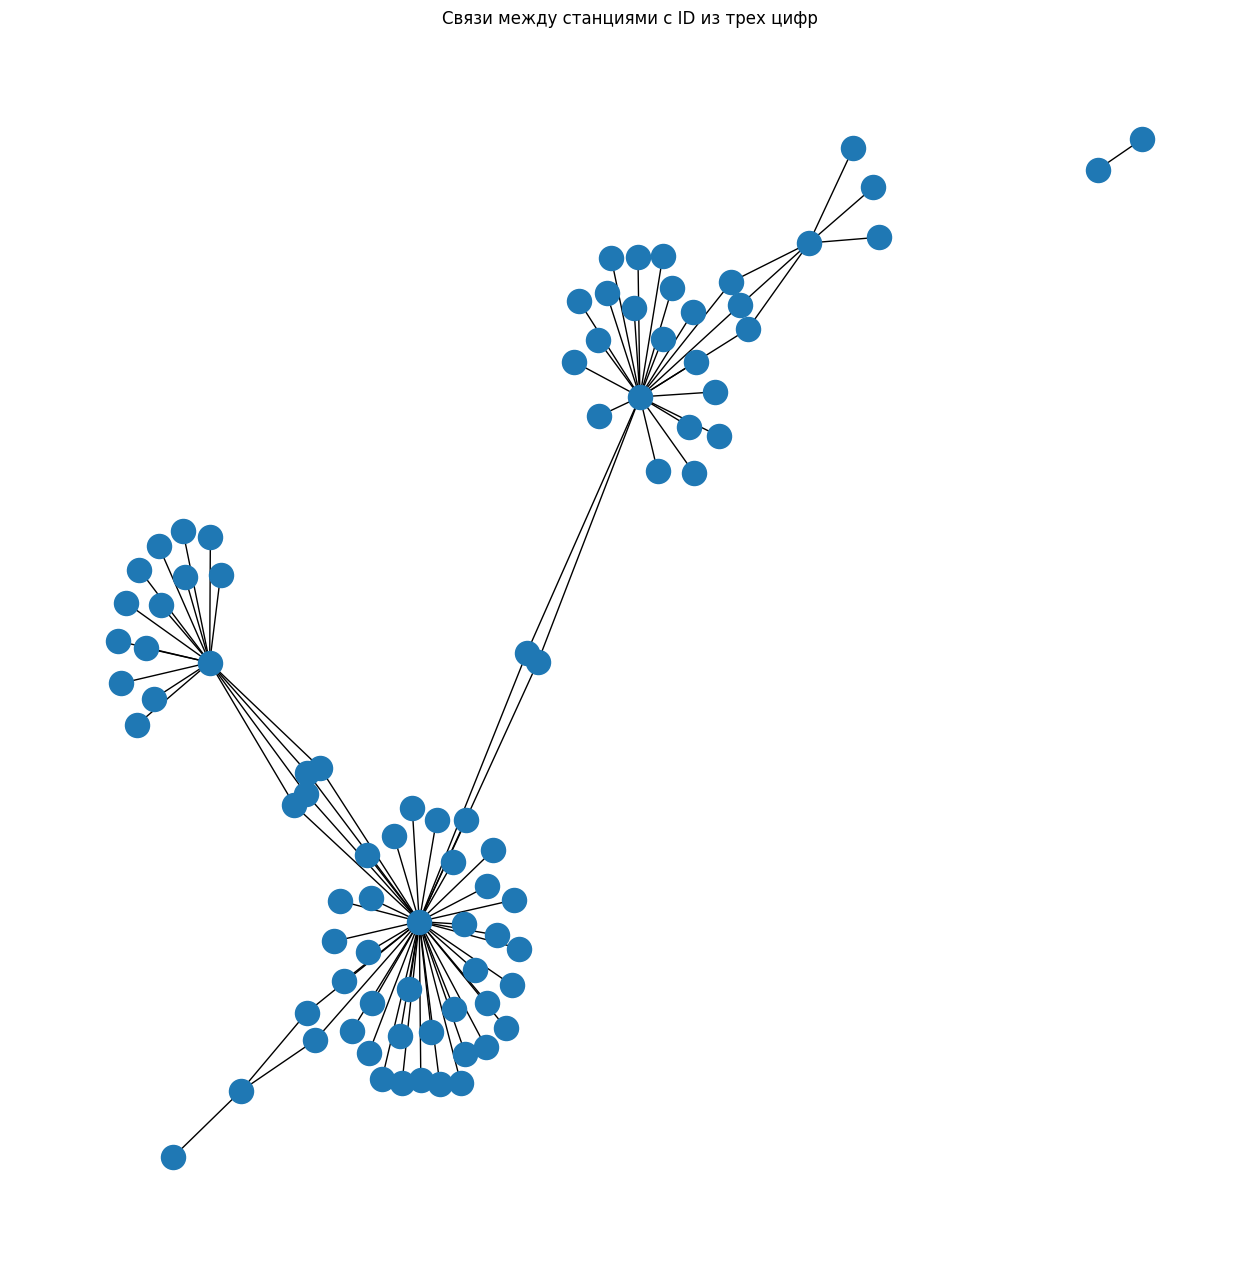

In [27]:
plt.figure(figsize=(16, 16))
plt.title("Связи между станциями с ID из трех цифр")
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos)

## Проверим гипотезу о станциях с зарядкой

In [25]:
chrg_df = df[(df['start_station_id'].str.contains('^chargingstx')) |
             (df['end_station_id'].str.contains('^chargingstx')) &
             (df['start_station_id'] != df['end_station_id'])]

In [26]:
chrg_trips = pd.DataFrame(chrg_df[['start_station_name', 'end_station_name'
                                   ]].value_counts()).reset_index().head(150)
G = nx.from_pandas_edgelist(chrg_trips,
                            'start_station_name',
                            'end_station_name',
                            edge_attr='count')

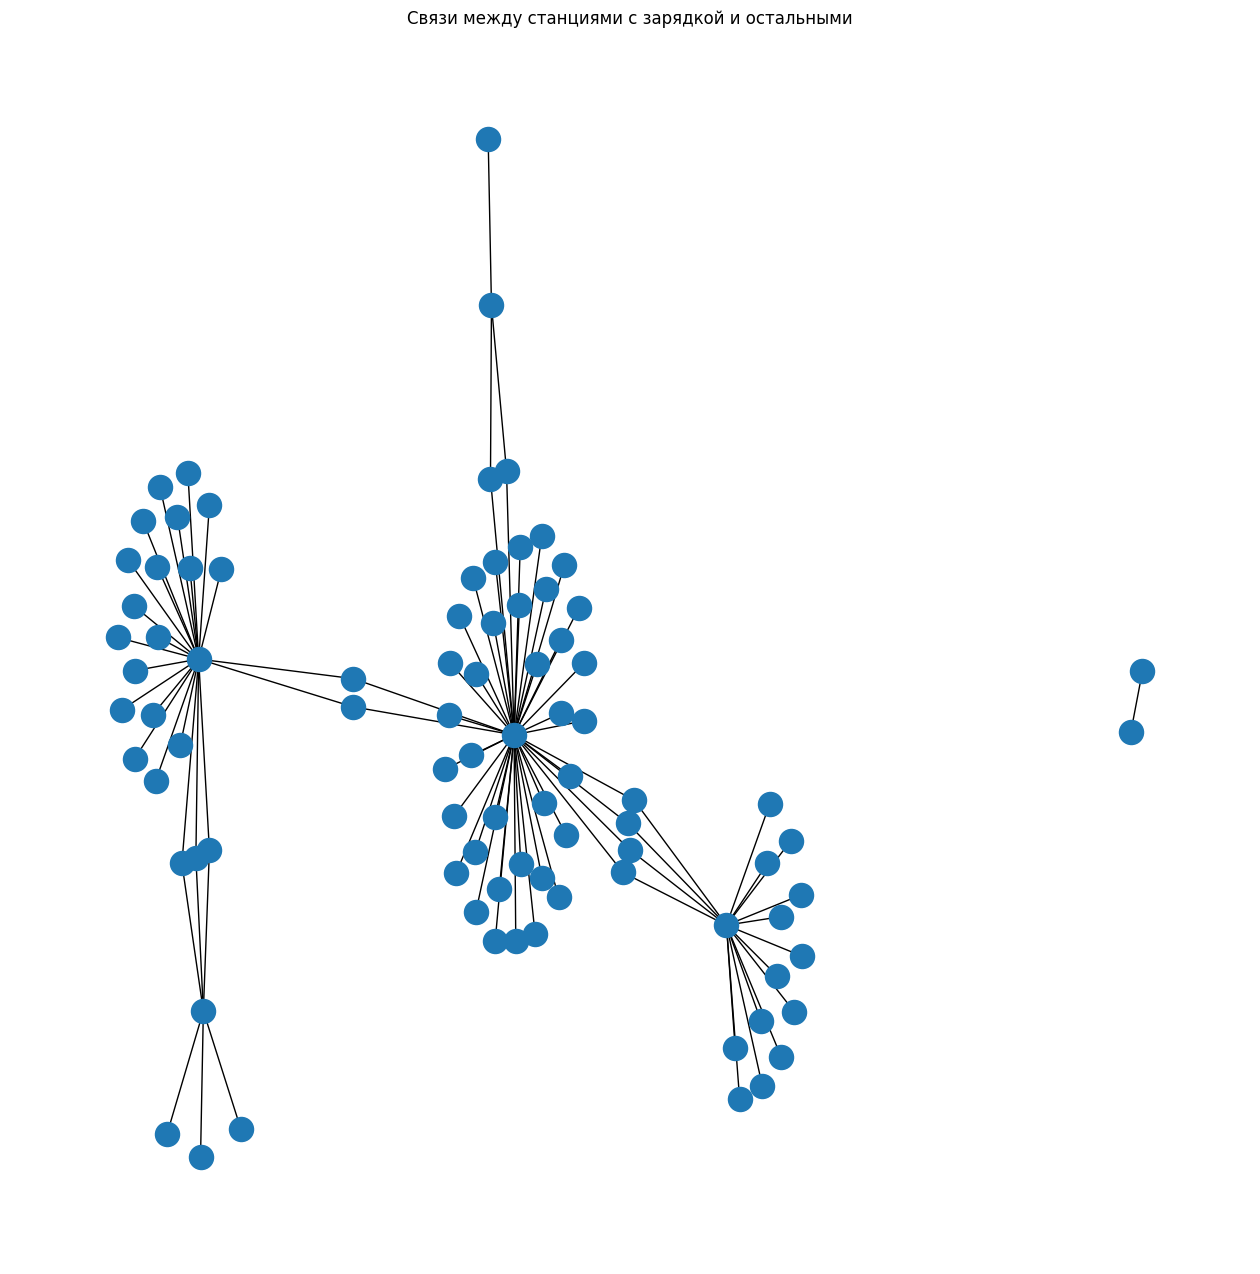

In [28]:
plt.figure(figsize=(16, 16))
plt.title("Связи между станциями с зарядкой и остальными")
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos)

# Результат проверки гипотезы
На итоговом графе со станциями с зарядкой наша гипотеза подтвердилась: вокруг зарядочных станций образовывается группа из других станций.